# Introducción

En este análisis, nos proponemos explorar la causalidad en las predicciones obtenidas a través del análisis SHAP. Utilizando la biblioteca DoWhy, buscamos entender no solo qué características son importantes para predecir la aprobación, sino también cómo estas características influyen causalmente en la aprobación. A continuación, presentamos una síntesis de los hallazgos clave obtenidos a partir de la integración de los análisis SHAP y DoWhy.

## Análisis de Características Principales con SHAP

Inicialmente, realizamos un análisis con SHAP para identificar las características más relevantes que afectan la probabilidad de aprobación. Según este análisis, las características más influyentes son:

- `hito1`
- `e29`
- `exitosos`
- `fallidos`
- `e42`
- `e3`
- `e35`
- `e13`
- `e26`
- `e18`
- `e32`
- `e10`
- `e0`
- `e4`
- `e23`
- `e7`
- `e17`
- `e25`
- `e22`
- `e8`

Estas características fueron identificadas como las más críticas, excluyendo `hito2` y otras columnas no listadas.

## Integración con Análisis de Causalidad DoWhy

Para profundizar nuestro entendimiento, integramos los insights obtenidos a través de SHAP con un análisis de causalidad utilizando DoWhy. Este análisis nos permite investigar cómo las características identificadas como importantes por SHAP influyen causalmente en la aprobación.

A través de este análisis de causalidad, buscamos responder preguntas cruciales como:

1. ¿Cómo la variación en `e42` afecta directa e indirectamente la aprobación?
2. ¿Cómo los efectos causales identificados pueden influir en la estrategia de intervención para mejorar las tasas de aprobación?


In [1]:
import dowhy
from dowhy import CausalModel
from sklearn.ensemble import RandomForestRegressor
import dowhy.causal_estimators.linear_regression_estimator

import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
from sys import path
import os

for dirname, _, filenames in os.walk("../../../resources/"):
    for filename in filenames:
        print(os.path.join(dirname, filename))
path.append(os.path.realpath("../../../"))

from custom import functions

warnings.filterwarnings("ignore")

../../../resources/allColProSol.xlsx
../../../resources/dataset_a_2021.csv
../../../resources/dataset_a_2021c2.csv
../../../resources/dataset_a_2021v1.xlsx
../../../resources/dataset_unab_ORIGINAL SIN P1.csv
../../../resources/dataset_unab_P1.csv
../../../resources/exitoFallidoEnviosProgramaSol.xlsx
../../../resources/exitoFallidoProgramaSol.xlsx
../../../resources/exitosoFallidosEnviosAllColProSol.xlsx
../../../resources/exitosoFallidosEnviosAllColSol.xlsx
../../../resources/exitososFallidosEnviosSol.xlsx
../../../resources/Hito12sinColCeroExitosoFallidosSol.xlsx
../../../resources/sinColCeroExitosoFallidosEnviosSol.xlsx
../../../resources/sinColCeroExitosoFallidosSol.xlsx
../../../resources/v2_hitosExitoFalloColESol1.csv
../../../resources/v2_hitosExitoFalloColESol1Prograna.csv
../../../resources/v2_hitosExitoFalloSol1Programa.csv
../../../resources/causalidad\causalidad.dot
../../../resources/causalidad\causalidad.png
../../../resources/causalidad\causalidad_e29.dot
../../../resourc

In [2]:
# Read and preview data
df = pd.read_csv(
    "../../../resources/v2_hitosExitoFalloColESol1.csv",
    delimiter=";",
    skipinitialspace=True,
)

In [3]:
# creando columna aprobado y con la funcion set_in_aprobado_nota poblamos la nueva columna.
df["aprobado"] = df.apply(lambda x: functions.set_in_aprobado_nota(x["sol1"]), axis=1)
# revisamos la existencia de la nueva columna.
print(df.columns)

Index(['hito1', 'hito2', 'exitosos', 'fallidos', 'e0', 'e1', 'e2', 'e3', 'e4',
       'e5', 'e6', 'e7', 'e8', 'e9', 'e10', 'e11', 'e12', 'e13', 'e14', 'e15',
       'e16', 'e17', 'e18', 'e19', 'e20', 'e21', 'e22', 'e23', 'e24', 'e25',
       'e26', 'e27', 'e28', 'e29', 'e30', 'e31', 'e32', 'e33', 'e34', 'e35',
       'e36', 'e37', 'e38', 'e39', 'e40', 'e41', 'e42', 'e43', 'e44', 'e45',
       'e46', 'e47', 'e48', 'e49', 'e50', 'e51', 'e52', 'sol1', 'aprobado'],
      dtype='object')


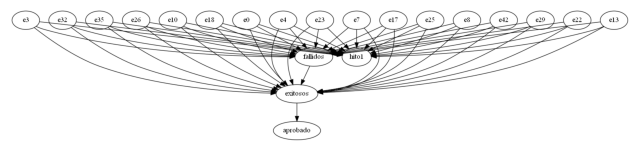

In [4]:
# Paso 1: Modelar un problema causal
model = CausalModel(
    data=df,
    treatment="e26",
    outcome="aprobado",
    graph="""
    digraph {
        e42 -> exitosos;
        e42 -> fallidos;
        e42 -> hito1;
        e29 -> exitosos;
        e29 -> fallidos;
        e29 -> hito1;
        e3 -> exitosos;
        e3 -> fallidos;
        e3 -> hito1;
        e35 -> exitosos;
        e35 -> fallidos;
        e35 -> hito1;
        e13 -> exitosos;
        e13 -> fallidos;
        e13 -> hito1;
        e26 -> exitosos;
        e26 -> fallidos;
        e26 -> hito1;
        e18 -> exitosos;
        e18 -> fallidos;
        e18 -> hito1;
        e32 -> exitosos;
        e32 -> fallidos;
        e32 -> hito1;
        e10 -> exitosos;
        e10 -> fallidos;
        e10 -> hito1;
        e0 -> exitosos;
        e0 -> fallidos;
        e0 -> hito1;
        e4 -> exitosos;
        e4 -> fallidos;
        e4 -> hito1;
        e23 -> exitosos;
        e23 -> fallidos;
        e23 -> hito1;
        e7 -> exitosos;
        e7 -> fallidos;
        e7 -> hito1;
        e17 -> exitosos;
        e17 -> fallidos;
        e17 -> hito1;
        e25 -> exitosos;
        e25 -> fallidos;
        e25 -> hito1;
        e22 -> exitosos;
        e22 -> fallidos;
        e22 -> hito1;
        e8 -> exitosos;
        e8 -> fallidos;
        e8 -> hito1;
        fallidos -> exitosos;
        exitosos -> aprobado;
    }
    """,
)


# Visualizar el modelo causal con la variable de causa común no observada
model.view_model(
    layout="dot",
    file_name="../../../resources/causalidad/analisis_preguntas/graph_causal_model_e26_es",
)

In [5]:
# Paso 2: Identificar el estimando objetivo bajo el modelo
identified_estimand = model.identify_effect(proceed_when_unidentifiable=True)
print(identified_estimand)

Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
  d                
──────(E[aprobado])
d[e₂₆]             
Estimand assumption 1, Unconfoundedness: If U→{e26} and U→aprobado then P(aprobado|e26,,U) = P(aprobado|e26,)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
Estimand expression:
 ⎡     d                  d               ⎤
E⎢───────────(aprobado)⋅──────([exitosos])⎥
 ⎣d[exitosos]           d[e₂₆]            ⎦
Estimand assumption 1, Full-mediation: exitosos intercepts (blocks) all directed paths from e26 to a,p,r,o,b,a,d,o.
Estimand assumption 2, First-stage-unconfoundedness: If U→{e26} and U→{exitosos} then P(exitosos|e26,U) = P(exitosos|e26)
Estimand assumption 3, Second-stage-unconfoundedness: If U→{exitosos} and U→aprobado then P(aprobado|exitosos, e26, U) = P(aprobado|exitosos, e26)



In [6]:
# Paso 3: Estimar el efecto causal usando un método basado en árboles
estimate = model.estimate_effect(
    identified_estimand,
    method_name="backdoor.econml.dml.DML",
    control_value=0,
    treatment_value=1,
    target_units="ate",  # Average Treatment Effect
    method_params={
        "init_params": {
            "model_y": RandomForestRegressor(),
            "model_t": RandomForestRegressor(),
            "model_final": RandomForestRegressor(
                max_depth=10,
                min_samples_split=10,
                min_samples_leaf=5,
                random_state=1502,
                n_estimators=500,
            ),
            "featurizer": None,
        },
        "fit_params": {},
    },
)

print(estimate)

*** Causal Estimate ***

## Identified estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
  d                
──────(E[aprobado])
d[e₂₆]             
Estimand assumption 1, Unconfoundedness: If U→{e26} and U→aprobado then P(aprobado|e26,,U) = P(aprobado|e26,)

## Realized estimand
b: aprobado~e26 | e42,e18,e0,e10,e35,e4,e3,e23,e13,e7,e22,e29,e32,e8,e25,e17
Target units: ate

## Estimate
Mean value: -0.015849692615347424
Effect estimates: [[-5.65803898e-02]
 [-7.09727890e-02]
 [-1.76535564e-01]
 [ 9.93014204e-03]
 [ 9.93014204e-03]
 [ 9.93014204e-03]
 [ 9.93014204e-03]
 [ 9.93014204e-03]
 [ 9.93014204e-03]
 [ 9.93014204e-03]
 [ 9.93014204e-03]
 [ 9.93014204e-03]
 [ 9.93014204e-03]
 [-7.09727890e-02]
 [ 9.93014204e-03]
 [-7.81056459e-02]
 [ 9.93014204e-03]
 [-1.66678931e-01]
 [ 9.93014204e-03]
 [ 9.93014204e-03]
 [-7.09727890e-02]
 [ 9.93014204e-03]
 [ 9.93014204e-03]
 [ 9.93014204e-03]
 [ 9.93014204e-03]
 [ 9.93014204e-0

In [7]:
# Refutador de datos aleatorios
refute1 = model.refute_estimate(
    identified_estimand, estimate, method_name="random_common_cause"
)
print(refute1)

Refute: Add a random common cause
Estimated effect:-0.015849692615347424
New effect:0.08669269753273294
p value:0.3400000000000001



In [8]:
# Refutador de causa común no observada
refute2 = model.refute_estimate(
    identified_estimand,
    estimate,
    method_name="add_unobserved_common_cause",
    confounders_effect_on_treatment="binary_flip",
    confounders_effect_on_outcome="binary_flip",
    effect_strength_on_treatment=0.01,
    effect_strength_on_outcome=0.02,
)
print(refute2)

Refute: Add an Unobserved Common Cause
Estimated effect:-0.015849692615347424
New effect:0.08144065131203698



In [9]:
# Paso 4: Refutar el estimado obtenido
refute3 = model.refute_estimate(
    identified_estimand,
    estimate,
    method_name="placebo_treatment_refuter",
    placebo_type="permute",
)
print(refute3)

Refute: Use a Placebo Treatment
Estimated effect:-0.015849692615347424
New effect:0.0019507494669763058
p value:0.96



In [10]:
# Natural direct effect (nde)
identified_estimand_nde = model.identify_effect(
    estimand_type="nonparametric-nde",
    proceed_when_unidentifiable=True,
)
print(identified_estimand_nde)

Estimand type: EstimandType.NONPARAMETRIC_NDE

### Estimand : 1
Estimand name: mediation
Estimand expression:
 ⎡  d                      ⎤
E⎢──────(aprobado|exitosos)⎥
 ⎣d[e₂₆]                   ⎦
Estimand assumption 1, Mediation: exitosos intercepts (blocks) all directed paths from e26 to a,p,r,o,b,a,d,o except the path {e26}→{a,p,r,o,b,a,d,o}.
Estimand assumption 2, First-stage-unconfoundedness: If U→{e26} and U→{exitosos} then P(exitosos|e26,U) = P(exitosos|e26)
Estimand assumption 3, Second-stage-unconfoundedness: If U→{exitosos} and U→aprobado then P(aprobado|exitosos, e26, U) = P(aprobado|exitosos, e26)



In [11]:
causal_estimate_nde = model.estimate_effect(
    identified_estimand_nde,
    method_name="mediation.two_stage_regression",
    confidence_intervals=False,
    test_significance=False,
    method_params={
        "first_stage_model": dowhy.causal_estimators.linear_regression_estimator.LinearRegressionEstimator,
        "second_stage_model": dowhy.causal_estimators.linear_regression_estimator.LinearRegressionEstimator,
    },
)
print(causal_estimate_nde)

*** Causal Estimate ***

## Identified estimand
Estimand type: EstimandType.NONPARAMETRIC_NDE

### Estimand : 1
Estimand name: mediation
Estimand expression:
 ⎡  d                      ⎤
E⎢──────(aprobado|exitosos)⎥
 ⎣d[e₂₆]                   ⎦
Estimand assumption 1, Mediation: exitosos intercepts (blocks) all directed paths from e26 to a,p,r,o,b,a,d,o except the path {e26}→{a,p,r,o,b,a,d,o}.
Estimand assumption 2, First-stage-unconfoundedness: If U→{e26} and U→{exitosos} then P(exitosos|e26,U) = P(exitosos|e26)
Estimand assumption 3, Second-stage-unconfoundedness: If U→{exitosos} and U→aprobado then P(aprobado|exitosos, e26, U) = P(aprobado|exitosos, e26)

## Realized estimand
(b: aprobado~e26+e26*e42+e26*e18+e26*e0+e26*e10+e26*e35+e26*e4+e26*e3+e26*e23+e26*e13+e26*e7+e26*e22+e26*e29+e26*e32+e26*e8+e26*e25+e26*e17) - ((b: exitosos~e26+e26*e42+e26*e18+e26*e0+e26*e10+e26*e35+e26*e4+e26*e3+e26*e23+e26*e13+e26*e7+e26*e22+e26*e29+e26*e32+e26*e8+e26*e25+e26*e17)*(b: aprobado~exitosos+exitos

In [12]:
# Natural indirect effect (nie)
identified_estimand_nie = model.identify_effect(
    estimand_type="nonparametric-nie", proceed_when_unidentifiable=True
)
print(identified_estimand_nie)

Estimand type: EstimandType.NONPARAMETRIC_NIE

### Estimand : 1
Estimand name: mediation
Estimand expression:
 ⎡     d                  d               ⎤
E⎢───────────(aprobado)⋅──────([exitosos])⎥
 ⎣d[exitosos]           d[e₂₆]            ⎦
Estimand assumption 1, Mediation: exitosos intercepts (blocks) all directed paths from e26 to a,p,r,o,b,a,d,o except the path {e26}→{a,p,r,o,b,a,d,o}.
Estimand assumption 2, First-stage-unconfoundedness: If U→{e26} and U→{exitosos} then P(exitosos|e26,U) = P(exitosos|e26)
Estimand assumption 3, Second-stage-unconfoundedness: If U→{exitosos} and U→aprobado then P(aprobado|exitosos, e26, U) = P(aprobado|exitosos, e26)



In [13]:
causal_estimate_nie = model.estimate_effect(
    identified_estimand_nie,
    method_name="mediation.two_stage_regression",
    confidence_intervals=False,
    test_significance=False,
    method_params={
        "first_stage_model": dowhy.causal_estimators.linear_regression_estimator.LinearRegressionEstimator,
        "second_stage_model": dowhy.causal_estimators.linear_regression_estimator.LinearRegressionEstimator,
    },
)
print(causal_estimate_nie)

*** Causal Estimate ***

## Identified estimand
Estimand type: EstimandType.NONPARAMETRIC_NIE

### Estimand : 1
Estimand name: mediation
Estimand expression:
 ⎡     d                  d               ⎤
E⎢───────────(aprobado)⋅──────([exitosos])⎥
 ⎣d[exitosos]           d[e₂₆]            ⎦
Estimand assumption 1, Mediation: exitosos intercepts (blocks) all directed paths from e26 to a,p,r,o,b,a,d,o except the path {e26}→{a,p,r,o,b,a,d,o}.
Estimand assumption 2, First-stage-unconfoundedness: If U→{e26} and U→{exitosos} then P(exitosos|e26,U) = P(exitosos|e26)
Estimand assumption 3, Second-stage-unconfoundedness: If U→{exitosos} and U→aprobado then P(aprobado|exitosos, e26, U) = P(aprobado|exitosos, e26)

## Realized estimand
(b: exitosos~e26+e26*e42+e26*e18+e26*e0+e26*e10+e26*e35+e26*e4+e26*e3+e26*e23+e26*e13+e26*e7+e26*e22+e26*e29+e26*e32+e26*e8+e26*e25+e26*e17)*(b: aprobado~exitosos+exitosos*e42+exitosos*e18+exitosos*e0+exitosos*e10+exitosos*e35+exitosos*e4+exitosos*e3+exitosos*e23+exit